In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import requests
import json
from geopy.distance import geodesic
from sklearn import preprocessing

hdb_resale_prices = pd.read_csv("hdb_model_data.csv")

In [29]:
# drop the first column of hdb resale prices database
hdb_resale_prices.drop(columns=hdb_resale_prices.columns[0], inplace=True)
hdb_resale_prices.head()

,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
0,0.114583,0.0,0.0,0.229833,0.242702,0.377101,1.0,0.113027
1,0.098958,0.0,0.0,0.888889,0.181339,0.376605,1.0,0.339299
2,0.114583,0.0,0.0,0.243531,0.153615,0.373691,1.0,0.077851
3,0.114583,0.0,0.0,0.223744,0.212727,0.381423,1.0,0.128102
4,0.088542,0.0,0.0,0.292237,0.247779,0.408523,1.0,0.084059


In [30]:
hdb_resale_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77834 entries, 0 to 77833
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   floor_area_sqm              77834 non-null  float64
 1   no.of bto                   77834 non-null  float64
 2   resale application          77834 non-null  float64
 3   remaining_lease_months      77834 non-null  float64
 4   Distance to nearest MRT     77834 non-null  float64
 5   Distance to CBD             77834 non-null  float64
 6   isMatureEstate              77834 non-null  float64
 7   cpi_adjusted_price_per_sqm  77834 non-null  float64
dtypes: float64(8)
memory usage: 4.8 MB


### Feature Selection and Engineering - Support Vector Regression

In [32]:
df_svr = hdb_resale_prices
df_svr.dropna(inplace=True)
df_svr.head()

,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
0,0.114583,0.0,0.0,0.229833,0.242702,0.377101,1.0,0.113027
1,0.098958,0.0,0.0,0.888889,0.181339,0.376605,1.0,0.339299
2,0.114583,0.0,0.0,0.243531,0.153615,0.373691,1.0,0.077851
3,0.114583,0.0,0.0,0.223744,0.212727,0.381423,1.0,0.128102
4,0.088542,0.0,0.0,0.292237,0.247779,0.408523,1.0,0.084059


In [37]:
df_svr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77834 entries, 0 to 77833
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   floor_area_sqm              77834 non-null  float64
 1   no.of bto                   77834 non-null  float64
 2   resale application          77834 non-null  float64
 3   remaining_lease_months      77834 non-null  float64
 4   Distance to nearest MRT     77834 non-null  float64
 5   Distance to CBD             77834 non-null  float64
 6   isMatureEstate              77834 non-null  float64
 7   cpi_adjusted_price_per_sqm  77834 non-null  float64
dtypes: float64(8)
memory usage: 4.8 MB


<AxesSubplot:>

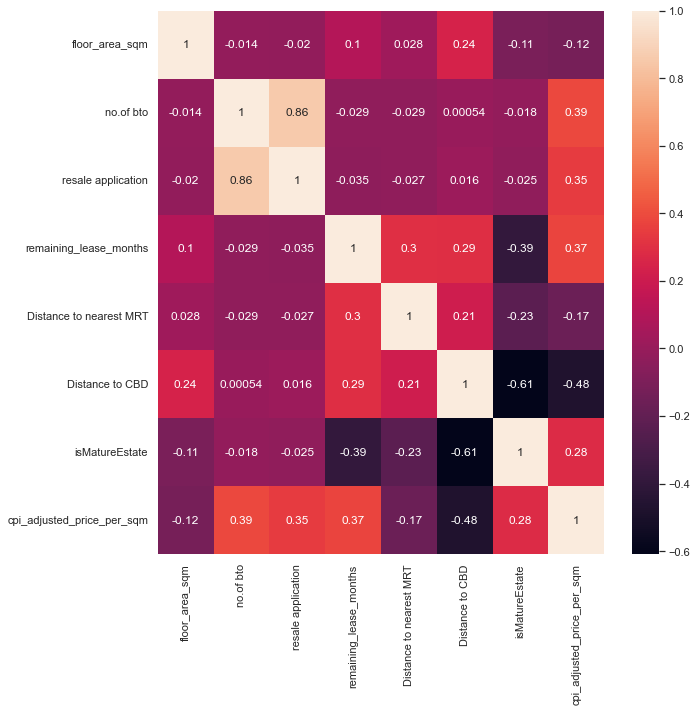

In [36]:
# plot correlation heatpmap 
sns.set (rc = {'figure.figsize':(10, 10)})
sns.heatmap(df_svr.corr(), annot=True)

### Split Data into Training and Test Sets

In [40]:
# declare independent and dependent variables
X = df_svr.drop(columns=['cpi_adjusted_price_per_sqm'])
y = df_svr[['cpi_adjusted_price_per_sqm']]

In [41]:
#Split the dataset into training and testing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# initiatie standard scalers for x and y variables
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# standardize x and y values
X_train = sc_x.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [42]:
X_train

array([[ 0.23716048, -1.31652382, -0.71315407, ...,  0.37577322,
         0.3730184 , -0.81134857],
       [-1.31584059,  1.20200159,  1.40222153, ...,  0.58570536,
         0.99182823, -0.81134857],
       [ 0.49599399, -0.04402651, -0.71315407, ..., -0.44165617,
         1.59029534, -0.81134857],
       ...,
       [ 0.58227183, -0.04402651, -0.71315407, ..., -1.29572846,
         0.10222357, -0.81134857],
       [ 1.05679993, -0.04402651, -0.71315407, ..., -0.59522868,
         0.03840014, -0.81134857],
       [-0.23736763,  1.20200159,  1.40222153, ...,  0.68203389,
         0.27893022, -0.81134857]])

In [43]:
y_train

array([[-1.38027519],
       [ 0.84366218],
       [-0.74534533],
       ...,
       [ 0.57454224],
       [-1.1341246 ],
       [ 0.77895326]])

### Train Support Vector Regression Model

In [44]:
# Fit the model with training data
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [45]:
# predict resale prices using the model with standardized test data

# standardize test data
standardScaler = StandardScaler()
X_test_norm = standardScaler.fit_transform(X_test)

y_pred = regressor.predict(X_test_norm)

y_pred

array([-0.61624789,  0.53782248, -0.46272408, ..., -0.12836924,
        0.2356451 , -0.09045647])

### Evaluate Support Vector Regression Model

In [47]:
from sklearn.metrics import mean_squared_error

# standardize y test values to compare with y predicted values
standardScaler = StandardScaler()
ytest = standardScaler.fit_transform(y_test)

mse = mean_squared_error(ytest, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  0.14391196911212
RMSE:  0.37935731060850797


In [48]:
# inverse standardize predicted values
y_pred = sc_y.inverse_transform([y_pred])
y_pred

array([[0.17569432, 0.2996942 , 0.19218979, ..., 0.22811477, 0.26722654,
        0.23218834]])

In [51]:
# derive r squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred[0])
print("R2 score: " + str(r2))

R2 score: 0.8564274712854888


In [52]:
# derive mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred[0])

0.02911103984311516

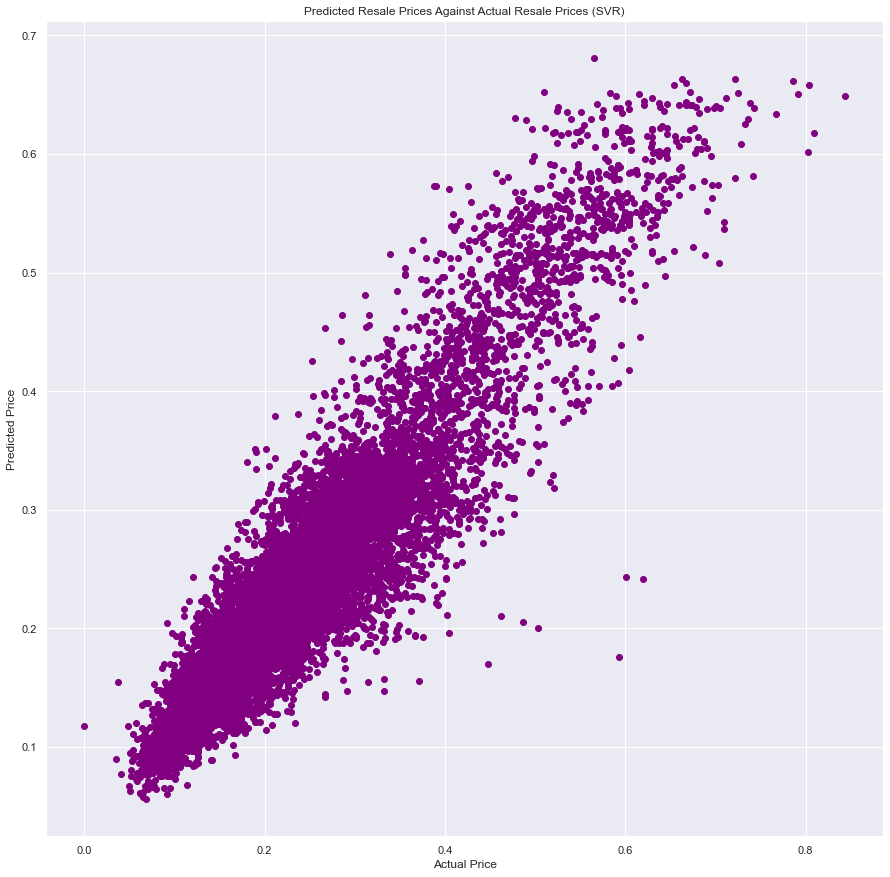

In [50]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(y_test, y_pred[0], color = 'purple')

# Add labels and title
plt.title('Predicted Resale Prices Against Actual Resale Prices (SVR)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

### K-Fold Cross Validation for Support Vector Regression Model

In [53]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR

# Create SVR model
svr_model = SVR(kernel='rbf', C=1, epsilon=0.1)

# Create k-fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [55]:
# enumerate splits
for train, test in kfold.split(df_svr):
   print('train: %s, test: %s' % (df_svr[train], df_svr[test]))

KeyError: "None of [Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,\n                9,\n            ...\n            77824, 77825, 77826, 77827, 77828, 77829, 77830, 77831, 77832,\n            77833],\n           dtype='int64', length=70050)] are in the [columns]"

In [ ]:
# Perform cross-validation
scores = cross_val_score(svr_model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Calculate average performance metric across all folds
mean_score = -scores.mean()

print('Average MSE:', mean_score)
